In [1]:
import os

# Chercher automatiquement le dossier du meilleur modèle
base_dir = os.getcwd()  # répertoire actuel
model_dirs = [d for d in os.listdir(base_dir) if d.startswith("lora_pix2pix")]

print("📂 Dossiers trouvés :")
for d in model_dirs:
    print(" -", d)

# Vérifier présence du meilleur modèle
best_model_path = os.path.join(base_dir, "lora_pix2pix_best")

if os.path.exists(best_model_path):
    print("\n✅ Meilleur modèle trouvé :")
    print(best_model_path)
else:
    print("\n❌ lora_pix2pix_best introuvable ! Vérifie le dossier.")


📂 Dossiers trouvés :
 - lora_pix2pix_best
 - lora_pix2pix_epoch1
 - lora_pix2pix_epoch10
 - lora_pix2pix_epoch2
 - lora_pix2pix_epoch3
 - lora_pix2pix_epoch4
 - lora_pix2pix_epoch5
 - lora_pix2pix_epoch6
 - lora_pix2pix_epoch7
 - lora_pix2pix_epoch8
 - lora_pix2pix_epoch9

✅ Meilleur modèle trouvé :
C:\Users\user\lora_pix2pix_best


Chargement du modèle...


C:\Users\user\anaconda3\envs\torch_env\lib\site-packages\diffusers\pipelines\pipeline_loading_utils.py:333: FutureWarning: You are loading the variant fp16 from timbrooks/instruct-pix2pix via `revision='fp16'`. This behavior is deprecated and will be removed in diffusers v1. One should use `variant='fp16'` instead. However, it appears that timbrooks/instruct-pix2pix currently does not have the required variant filenames in the 'main' branch. 
 The Diffusers team and community would be very grateful if you could open an issue: https://github.com/huggingface/diffusers/issues/new with the title 'timbrooks/instruct-pix2pix is missing fp16 files' so that the correct variant file can be added.
  warnings.warn(
Loading pipeline components...: 100%|████████████████████████████████████████████████████| 6/6 [00:00<00:00,  9.95it/s]
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_instruct_pix2pix.StableDiffusionInstructPix2PixPipelin

✅ Modèle + LoRA chargé !
Génération en cours...


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.82it/s]


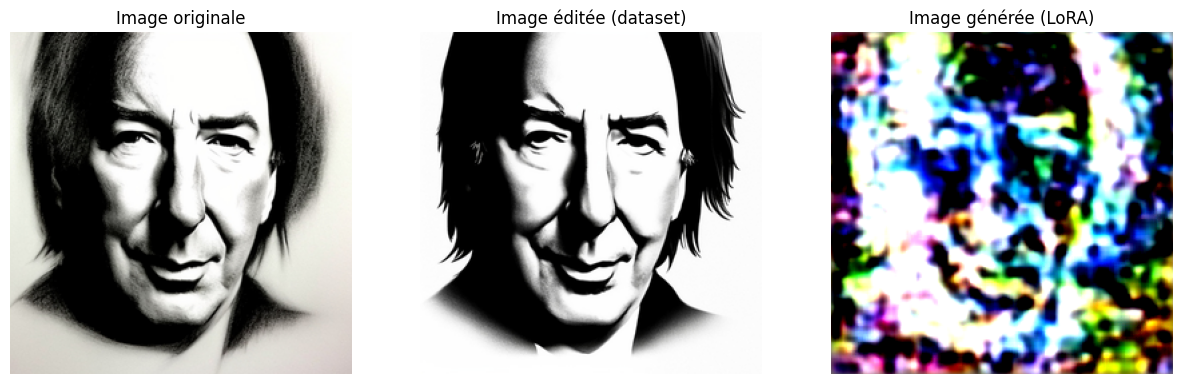

📝 PROMPT UTILISÉ :
make the portraits anime


In [4]:
# ============================================
#  TESTER LE LORA SUR TON DATASET
# ============================================

import torch
from diffusers import StableDiffusionInstructPix2PixPipeline
from peft import PeftModel
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import os

# ----------------------------
# 1) Charger votre LoRA
# ----------------------------
device = "cuda" if torch.cuda.is_available() else "cpu"
LORA_DIR = r"C:\Users\user\lora_pix2pix_best"

print("Chargement du modèle...")
pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(
    "timbrooks/instruct-pix2pix",
    torch_dtype=torch.float16,
    safety_checker=None,
    revision="fp16"
).to(device)

pipe.unet = PeftModel.from_pretrained(pipe.unet, LORA_DIR)
pipe.unet.to(device)
print("✅ Modèle + LoRA chargé !")

# ----------------------------
# 2) Charger une entrée du dataset
# ----------------------------
VAL_DIR = "dataset_leditspp_256/val"
meta_path = os.path.join(VAL_DIR, "metadata_fixed.tsv")

df = pd.read_csv(meta_path, sep="\t")

TEST_INDEX = 0   

row = df.iloc[TEST_INDEX]
prompt = row['edit_prompt']

orig_path = os.path.join(VAL_DIR, row['original_image_path'])
edit_path = os.path.join(VAL_DIR, row['edited_image_path'])

orig_img = Image.open(orig_path).convert("RGB")
target_img = Image.open(edit_path).convert("RGB")

# ----------------------------
# 3) Génération du modèle
# ----------------------------
print("Génération en cours...")
generated = pipe(
    prompt=prompt,
    image=orig_img,
    num_inference_steps=30,
    image_guidance_scale=1.3
).images[0]

# ----------------------------
# 4) AFFICHAGE
# ----------------------------
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(orig_img)
plt.title("Image originale")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(target_img)
plt.title("Image éditée (dataset)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(generated)
plt.title("Image générée (LoRA)")
plt.axis("off")

plt.show()

print("📝 PROMPT UTILISÉ :")
print(prompt)


Chargement du modèle...


C:\Users\user\anaconda3\envs\torch_env\lib\site-packages\diffusers\pipelines\pipeline_loading_utils.py:333: FutureWarning: You are loading the variant fp16 from timbrooks/instruct-pix2pix via `revision='fp16'`. This behavior is deprecated and will be removed in diffusers v1. One should use `variant='fp16'` instead. However, it appears that timbrooks/instruct-pix2pix currently does not have the required variant filenames in the 'main' branch. 
 The Diffusers team and community would be very grateful if you could open an issue: https://github.com/huggingface/diffusers/issues/new with the title 'timbrooks/instruct-pix2pix is missing fp16 files' so that the correct variant file can be added.
  warnings.warn(
Loading pipeline components...: 100%|████████████████████████████████████████████████████| 6/6 [00:00<00:00, 11.51it/s]
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_instruct_pix2pix.StableDiffusionInstructPix2PixPipelin

✅ Modèle + LoRA chargé !
Génération en cours...


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.23it/s]


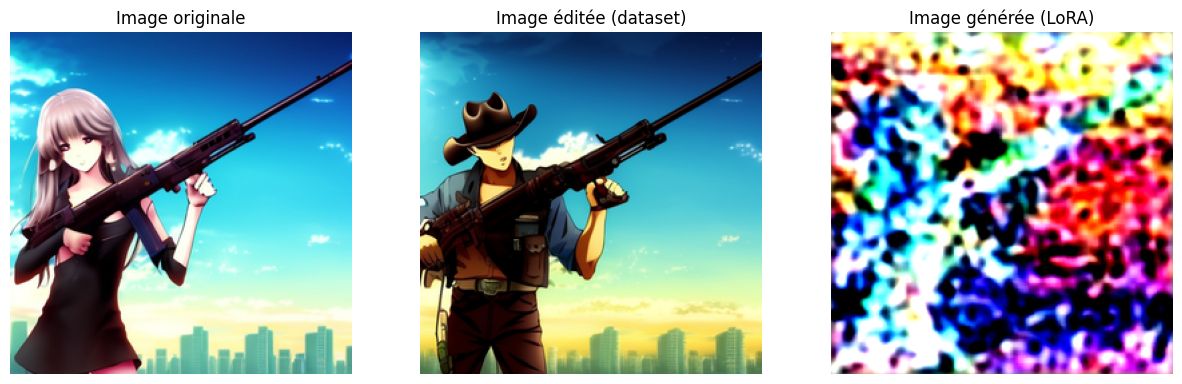

📝 PROMPT UTILISÉ :
make her a cowboy


In [6]:
# ============================================
#  TESTER LE LORA SUR TON DATASET
# ============================================

import torch
from diffusers import StableDiffusionInstructPix2PixPipeline
from peft import PeftModel
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import os

# ----------------------------
# 1) Charger votre LoRA
# ----------------------------
device = "cuda" if torch.cuda.is_available() else "cpu"
LORA_DIR = r"C:\Users\user\lora_pix2pix_best"

print("Chargement du modèle...")
pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(
    "timbrooks/instruct-pix2pix",
    torch_dtype=torch.float16,
    safety_checker=None,
    revision="fp16"
).to(device)

pipe.unet = PeftModel.from_pretrained(pipe.unet, LORA_DIR)
pipe.unet.to(device)
print("✅ Modèle + LoRA chargé !")

# ----------------------------
# 2) Charger une entrée du dataset
# ----------------------------
VAL_DIR = "dataset_leditspp_256/val"
meta_path = os.path.join(VAL_DIR, "metadata_fixed.tsv")

df = pd.read_csv(meta_path, sep="\t")

TEST_INDEX = 2   # change ici pour tester d’autres images

row = df.iloc[TEST_INDEX]
prompt = row['edit_prompt']

orig_path = os.path.join(VAL_DIR, row['original_image_path'])
edit_path = os.path.join(VAL_DIR, row['edited_image_path'])

orig_img = Image.open(orig_path).convert("RGB")
target_img = Image.open(edit_path).convert("RGB")

# ----------------------------
# 3) Génération du modèle
# ----------------------------
print("Génération en cours...")
generated = pipe(
    prompt=prompt,
    image=orig_img,
    num_inference_steps=30,
    image_guidance_scale=1.3
).images[0]

# ----------------------------
# 4) AFFICHAGE
# ----------------------------
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(orig_img)
plt.title("Image originale")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(target_img)
plt.title("Image éditée (dataset)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(generated)
plt.title("Image générée (LoRA)")
plt.axis("off")

plt.show()

print("📝 PROMPT UTILISÉ :")
print(prompt)


Chargement du modèle...


C:\Users\user\anaconda3\envs\torch_env\lib\site-packages\diffusers\pipelines\pipeline_loading_utils.py:333: FutureWarning: You are loading the variant fp16 from timbrooks/instruct-pix2pix via `revision='fp16'`. This behavior is deprecated and will be removed in diffusers v1. One should use `variant='fp16'` instead. However, it appears that timbrooks/instruct-pix2pix currently does not have the required variant filenames in the 'main' branch. 
 The Diffusers team and community would be very grateful if you could open an issue: https://github.com/huggingface/diffusers/issues/new with the title 'timbrooks/instruct-pix2pix is missing fp16 files' so that the correct variant file can be added.
  warnings.warn(
Loading pipeline components...: 100%|████████████████████████████████████████████████████| 6/6 [00:00<00:00, 13.77it/s]
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_instruct_pix2pix.StableDiffusionInstructPix2PixPipelin

✅ Modèle + LoRA chargé !
Génération en cours...


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.73it/s]


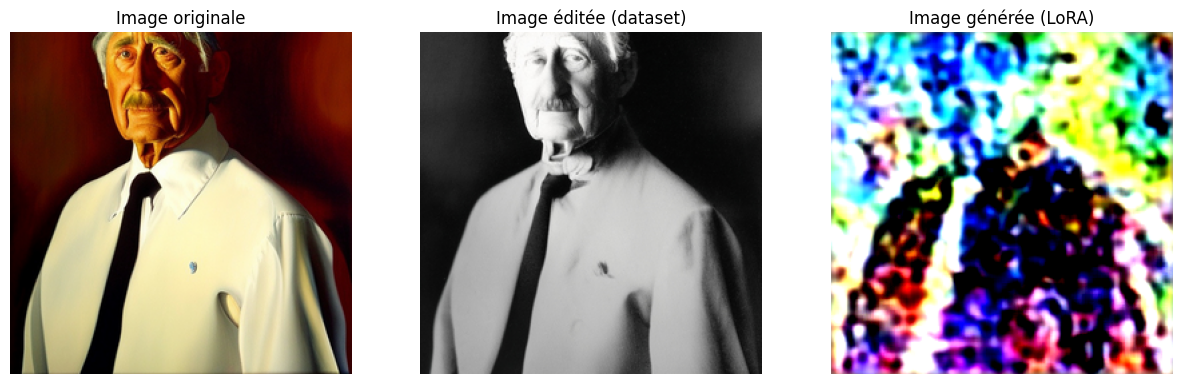

📝 PROMPT UTILISÉ :
have it be a photograph


In [11]:
# ============================================
#  TESTER LE LORA SUR TON DATASET
# ============================================

import torch
from diffusers import StableDiffusionInstructPix2PixPipeline
from peft import PeftModel
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import os

# ----------------------------
# 1) Charger votre LoRA
# ----------------------------
device = "cuda" if torch.cuda.is_available() else "cpu"
LORA_DIR = r"C:\Users\user\lora_pix2pix_best"

print("Chargement du modèle...")
pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(
    "timbrooks/instruct-pix2pix",
    torch_dtype=torch.float16,
    safety_checker=None,
    revision="fp16"
).to(device)

pipe.unet = PeftModel.from_pretrained(pipe.unet, LORA_DIR)
pipe.unet.to(device)
print("✅ Modèle + LoRA chargé !")

# ----------------------------
# 2) Charger une entrée du dataset
# ----------------------------
VAL_DIR = "dataset_leditspp_256/test"
meta_path = os.path.join(VAL_DIR, "metadata_fixed.tsv")

df = pd.read_csv(meta_path, sep="\t")

TEST_INDEX = 96   # change ici pour tester d’autres images

row = df.iloc[TEST_INDEX]
prompt = row['edit_prompt']

orig_path = os.path.join(VAL_DIR, row['original_image_path'])
edit_path = os.path.join(VAL_DIR, row['edited_image_path'])

orig_img = Image.open(orig_path).convert("RGB")
target_img = Image.open(edit_path).convert("RGB")

# ----------------------------
# 3) Génération du modèle
# ----------------------------
print("Génération en cours...")
generated = pipe(
    prompt=prompt,
    image=orig_img,
    num_inference_steps=30,
    image_guidance_scale=1.3
).images[0]

# ----------------------------
# 4) AFFICHAGE
# ----------------------------
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(orig_img)
plt.title("Image originale")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(target_img)
plt.title("Image éditée (dataset)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(generated)
plt.title("Image générée (LoRA)")
plt.axis("off")

plt.show()

print("📝 PROMPT UTILISÉ :")
print(prompt)
